In [1]:
import pandas as pd
from datetime import datetime

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
import matplotlib.pyplot as plt

In [37]:
result = pd.read_pickle('../../simultrade/static/resultado.pkl')
result.shape

(1438, 7)

In [38]:
df = result.loc[result.last_extrm > 0]
df

,valor,tiempo,cross_cero,last,time,val_extrm,last_extrm
0,-0.001375,2022-02-14 14:32:59.999000,0.0,2947.77,1.644849e+12,-0.001375,2920.57
91,0.000018,2022-02-14 16:03:59.999000,1.0,2942.54,1.644855e+12,0.000018,2942.57
93,-0.000036,2022-02-14 16:05:59.999000,2.0,2937.80,1.644855e+12,-0.000036,2937.80
94,0.000009,2022-02-14 16:06:59.999000,3.0,2941.76,1.644855e+12,0.000009,2941.76
102,-0.000065,2022-02-14 16:14:59.999000,4.0,2934.71,1.644855e+12,-0.000065,2934.71
...,...,...,...,...,...,...,...
1340,0.000128,2022-02-15 12:52:59.999000,93.0,3113.20,1.644930e+12,0.000128,3119.00
1374,-0.000094,2022-02-15 13:26:59.999000,94.0,3100.00,1.644932e+12,-0.000094,3100.00
1379,0.000001,2022-02-15 13:31:59.999000,95.0,3108.03,1.644932e+12,0.000001,3108.03
1387,-0.000096,2022-02-15 13:39:59.999000,96.0,3097.49,1.644932e+12,-0.000096,3097.49


In [39]:
df.loc[:, 'percentChange'] = df['last_extrm'].pct_change()
df.loc[:, 'duracion/min'] = df['time'].diff()
df.loc[:, 'duracion/min'] = df['duracion/min']//(1000*60)
df

/home/luis/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/luis/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,valor,tiempo,cross_cero,last,time,val_extrm,last_extrm,percentChange,duracion/min
0,-0.001375,2022-02-14 14:32:59.999000,0.0,2947.77,1.644849e+12,-0.001375,2920.57,NaN,NaN
91,0.000018,2022-02-14 16:03:59.999000,1.0,2942.54,1.644855e+12,0.000018,2942.57,0.007533,91.0
93,-0.000036,2022-02-14 16:05:59.999000,2.0,2937.80,1.644855e+12,-0.000036,2937.80,-0.001621,2.0
94,0.000009,2022-02-14 16:06:59.999000,3.0,2941.76,1.644855e+12,0.000009,2941.76,0.001348,1.0
102,-0.000065,2022-02-14 16:14:59.999000,4.0,2934.71,1.644855e+12,-0.000065,2934.71,-0.002397,8.0
...,...,...,...,...,...,...,...,...,...
1340,0.000128,2022-02-15 12:52:59.999000,93.0,3113.20,1.644930e+12,0.000128,3119.00,0.006454,12.0
1374,-0.000094,2022-02-15 13:26:59.999000,94.0,3100.00,1.644932e+12,-0.000094,3100.00,-0.006092,34.0
1379,0.000001,2022-02-15 13:31:59.999000,95.0,3108.03,1.644932e+12,0.000001,3108.03,0.002590,5.0
1387,-0.000096,2022-02-15 13:39:59.999000,96.0,3097.49,1.644932e+12,-0.000096,3097.49,-0.003391,8.0


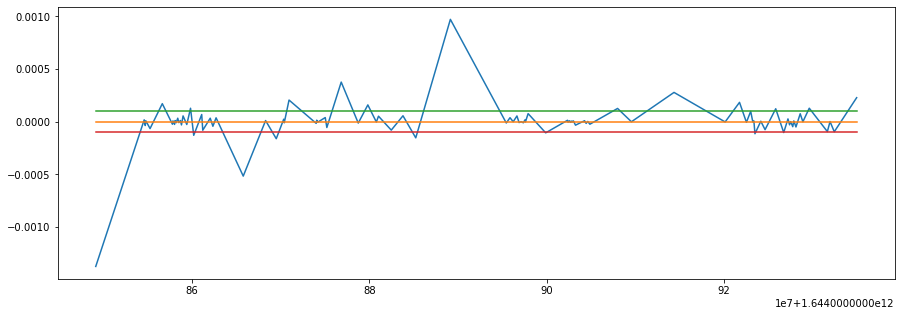

In [30]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
import matplotlib.pyplot as plt


x = result.loc[result.last_extrm > 0]['time']
y = result.loc[result.last_extrm > 0]['val_extrm']
z = [0] * len(y)
z1 = [.0001] * len(y)
z2 = [-.0001] * len(y)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, z1)
plt.plot(x, z2)

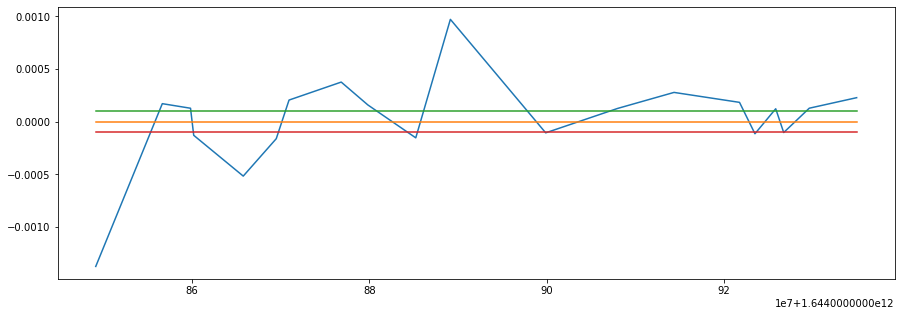

In [6]:
x = result.loc[result.last_extrm > 0].loc[abs(result.val_extrm) >= .0001] ['time']
y = result.loc[result.last_extrm > 0].loc[abs(result.val_extrm) >= .0001] ['val_extrm']

z = [0] * len(y)
z1 = [.0001] * len(y)
z2 = [-.0001] * len(y)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, z1)
plt.plot(x, z2)

In [17]:
a = [1,2,5,6,1,4]
max(a)

6

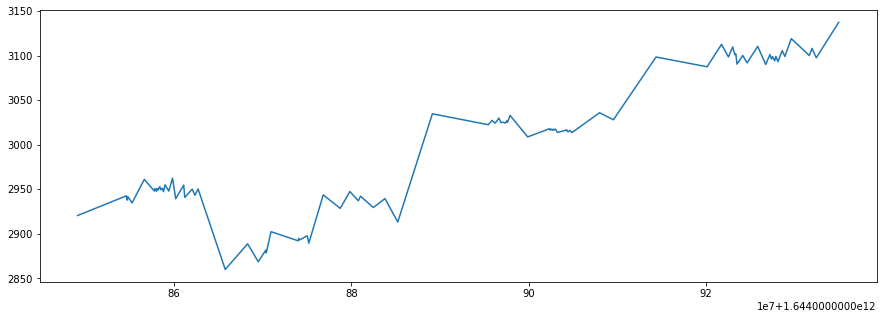

In [7]:
x = result.loc[result.last_extrm > 0]['time']
y = result.loc[result.last_extrm > 0]['last_extrm']


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)

analisis de duracion de tendencia lineal de resultados

m = ( y2 - y1 ) / ( x2 - x1 ) pendiente

b = y2 - (m * x2) termino independiente


In [26]:
durac_lineal = result.loc[result.last_extrm > 0][['time', 'last_extrm']]

durac_lineal.time = durac_lineal.time.astype(int)

durac_lineal['durac'] = durac_lineal.time.diff()//1000

durac_lineal = durac_lineal.dropna()

durac_lineal.durac = durac_lineal.durac.astype(int)

durac_lineal['pendte'] = durac_lineal.last_extrm.diff() / durac_lineal.time.diff()

durac_lineal

,time,last_extrm,durac,pendte
22,1644505499999,45562.25,960,NaN
75,1644508679999,44837.43,3180,-0.000228
77,1644508799999,44947.10,120,0.000914
78,1644508859999,44905.13,60,-0.000700
81,1644509039999,45119.88,180,0.001193
...,...,...,...,...
1332,1644584099999,43634.99,420,0.000447
1340,1644584579999,43516.42,480,-0.000247
1360,1644585779999,43814.84,1200,0.000249
1413,1644588959999,43517.29,3180,-0.000094


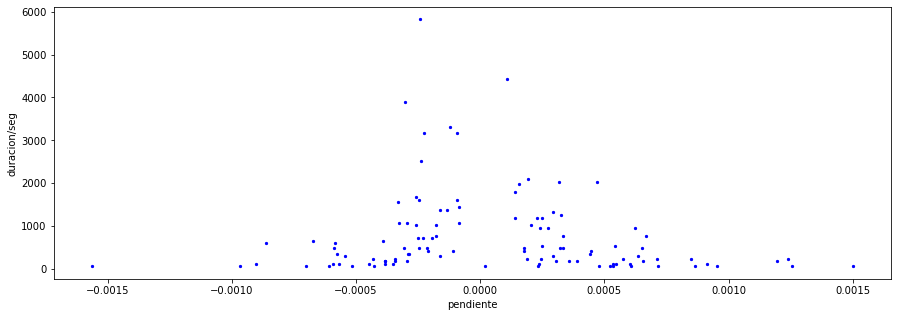

In [34]:
x = durac_lineal.pendte[1:]
y = durac_lineal.durac[1:]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('pendiente')
plt.ylabel('duracion/seg')

plt.scatter(x, y, s=5, color='b')

In [29]:
df_durac = durac_lineal.dropna().sort_values(by=['pendte'])


In [30]:
df_durac

,time,last_extrm,durac,pendte
482,1644533099999,43900.00,60,-0.001564
499,1644534119999,43901.91,60,-0.000968
727,1644547799999,42983.11,120,-0.000903
188,1644515459999,45075.49,600,-0.000864
78,1644508859999,44905.13,60,-0.000700
...,...,...,...,...
199,1644516119999,45374.02,60,0.000952
81,1644509039999,45119.88,180,0.001193
1136,1644572339999,43586.89,240,0.001239
244,1644518819999,45142.19,60,0.001256


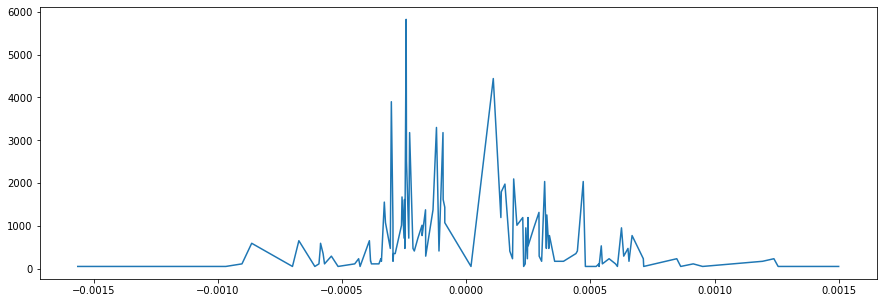

In [31]:
x = df_durac['pendte']
y = df_durac['durac']


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)